h_number: [0, 1, 2, 3, 4, 5]
xi: [-65895.05845515737, -65960.39977542235, -65970.84452949517, -65979.11907109202, -65991.04228461212, -66001.20904454554]
lli: [-65879.47, -65934.49192477256, -65933.47214627702, -65928.66532180988, -65929.79056928359, -65928.06741297327]
penalty: [15.589705157368549, 25.907850649793453, 37.37238321813762, 50.45374928213815, 61.2517153285341, 73.14163157226945]
selected: [1, 0, 0, 0, 0, 0]


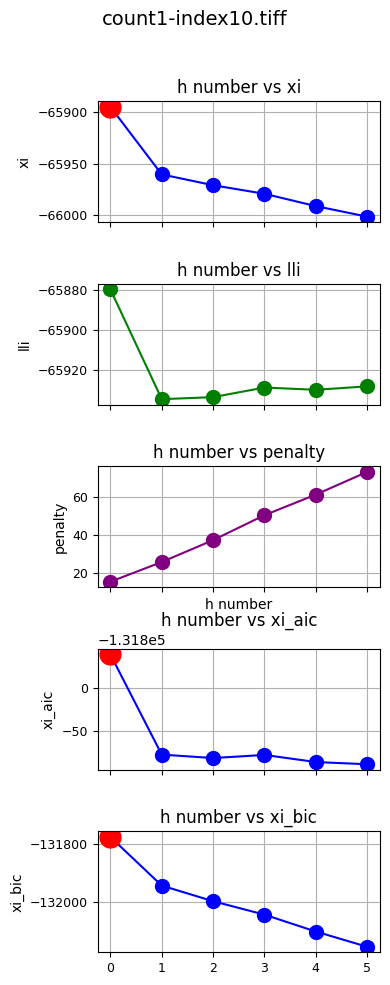

Position values:
[[31999.907002 nan nan]
 [20652.184844 80.674916 84.357044]]


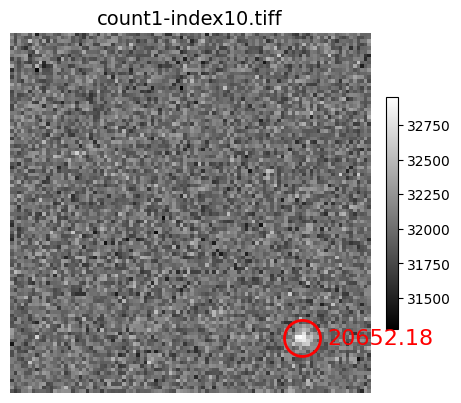

In [ ]:
file_path = 'count1-index10.tiff'
import matplotlib.pyplot as plt
import re
import pandas as pd

# Load the CSV file

scores_file = "scores.csv"
df = pd.read_csv(scores_file)

df['extracted_filename'] = df['image_filename (h number)'].str.extract(r'([^\\/]+\.tiff)')

# Filter rows where the extracted filename matches the target file_path
filtered_data = df[df["extracted_filename"] == file_path]

# Display the filtered data

# Extract values
h_number = filtered_data['h number'].tolist()
xi = filtered_data['xi'].tolist()
lli = filtered_data['lli'].tolist()
penalty = filtered_data['penalty'].tolist()
selected = filtered_data['selected?'].tolist()

xi_aic = filtered_data['xi_aic'].tolist()
xi_bic = filtered_data['xi_bic'].tolist()

# Display extracted values
print("h_number:", h_number)
print("xi:", xi)
print("lli:", lli)
print("penalty:", penalty)
print("selected:", selected)

# Create figure and subplots
fig, axes = plt.subplots(5, 1, figsize=(4, 10), sharex=True)
fig.suptitle(file_path, fontsize=14)

# Plot h number vs xi
axes[0].plot(h_number, xi, marker='o', color='blue', markersize=10)
for i, sel in enumerate(selected):
    if sel == 1:
        axes[0].plot(h_number[i], xi[i], marker='o', color='red', markersize=15)
axes[0].set_title('h number vs xi', fontsize=12)
axes[0].set_ylabel('xi', fontsize=10)
axes[0].tick_params(axis='both', labelsize=9)
axes[0].grid(True)
# axes[0].legend(fontsize=9, loc='center right')

# Plot h number vs lli
axes[1].plot(h_number, lli, marker='o', color='green', markersize=10)
axes[1].set_title('h number vs lli', fontsize=12)
axes[1].set_ylabel('lli', fontsize=10)
axes[1].tick_params(axis='both', labelsize=9)
axes[1].grid(True)

# Plot h number vs penalty
axes[2].plot(h_number, penalty, marker='o', color='purple', markersize=10)
axes[2].set_title('h number vs penalty', fontsize=12)
axes[2].set_xlabel('h number', fontsize=10)
axes[2].set_ylabel('penalty', fontsize=10)
axes[2].tick_params(axis='both', labelsize=9)
axes[2].grid(True)

# Plot h number vs xi_aic
axes[3].plot(h_number, xi_aic, marker='o', color='blue', markersize=10)
i = np.argmax(xi_aic)
axes[3].plot(h_number[i], xi_aic[i], marker='o', color='red', markersize=15)
axes[3].set_title('h number vs xi_aic', fontsize=12)
axes[3].set_ylabel('xi_aic', fontsize=10)
axes[3].tick_params(axis='both', labelsize=9)
axes[3].grid(True)

# Plot h number vs xi_bic
axes[4].plot(h_number, xi_bic, marker='o', color='blue', markersize=10)
i = np.argmax(xi_bic)
axes[4].plot(h_number[i], xi_bic[i], marker='o', color='red', markersize=15)
axes[4].set_title('h number vs xi_bic', fontsize=12)
axes[4].set_ylabel('xi_bic', fontsize=10)
axes[4].tick_params(axis='both', labelsize=9)
axes[4].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import tifffile
from io import StringIO

# Function to process the value and extract mapping data
def extract_mapping_data(value):
    # Check if the value starts with '[[' indicating a nested array
    if value.startswith('[['):
        # Remove brackets and split into lines
        content = value.strip().replace('[', '').replace(']', '')
        # Use np.genfromtxt to parse into a numpy array
        mapping_data = np.genfromtxt(StringIO(content), delimiter=' ', ndmin=2)
    else:
        # If the value is not a nested array, treat it as a single value
        mapping_data = np.array([[float(value)]])
    
    # Extract intensity, x, and y (handling cases with only one row or multiple rows)
    intensity = mapping_data[1:, 0] if mapping_data.shape[0] > 1 else []
    x_coords = mapping_data[1:, 1] if mapping_data.shape[0] > 1 else []
    y_coords = mapping_data[1:, 2] if mapping_data.shape[0] > 1 else []
    
    return intensity, x_coords, y_coords

# Load the CSV file into a DataFrame
data = pd.read_csv(scores_file, )  # Assuming tab-separated CSV

# Filter rows where 'image_filename (h number)' matches the target file path
# Extract the part after the last '\\' and before " (" for matching
data['filename_base'] = data['image_filename (h number)'].str.extract(r'([^\\]+\.tiff) \(')

# Get the rows matching the target file and where 'selected?' is 1
# selected_row = data[(data['filename_base'] == file_path) & (data['selected?'] == 1)]
selected_row = data[(data['filename_base'] == file_path) & (data['h number'] == 1)]

# Extract the position values from the last column
if not selected_row.empty:
    position_column = selected_row.iloc[:, 8].values[0]  # Assuming positions are in the last column
    print("Position values:")
    print(position_column)
else:
    print("No matching rows found or no row marked as selected.")

pass

intensity, x_coords, y_coords = extract_mapping_data(position_column)

# # Extract intensity, x, and y
# intensity = mapping_data[1:, 0]
# x_coords = mapping_data[1:, 1]
# y_coords = mapping_data[1:, 2]

# Load the image data
image_data = tifffile.imread(file_path)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Display the image
cax = ax.imshow(image_data, cmap='gray')

# Add the colorbar
cbar = plt.colorbar(cax, ax=ax, fraction=0.03, pad=0.04, )
cbar.ax.tick_params(labelsize=10)

plt.draw()

# Plot the circles and text for each valid coordinate
for i, (x, y, value) in enumerate(zip(x_coords, y_coords, intensity)):
    if not np.isnan(x) and not np.isnan(y):
        circle = Circle((x, y), radius=5, edgecolor='red', facecolor='none', lw=2)
        ax.add_patch(circle)
                # Convert data coordinates to display coordinates
        display_coords = ax.transData.transform((x + 7, y))
        # Convert display coordinates to figure coordinates
        fig_coords = fig.transFigure.inverted().transform(display_coords)
        
        # Add text in figure coordinates
        fig.text(fig_coords[0], fig_coords[1], f"{value:.2f}", 
                color='red', fontsize=16, 
                ha='left', va='center')
        # # text = ax.text(x + 7, y, f"{value:.2f}", color='red', fontsize=16, ha='left', va='center', zorder=1000)
        # text = ax.text(x - 14, y-10, f"{value:.2f}", color='red', fontsize=16, ha='left', va='center', zorder=1000)
        # text.set_clip_on(False)


# Set the title as the filename
ax.set_title(file_path, fontsize=14)

# Remove axis labels
ax.axis('off')

plt.show()

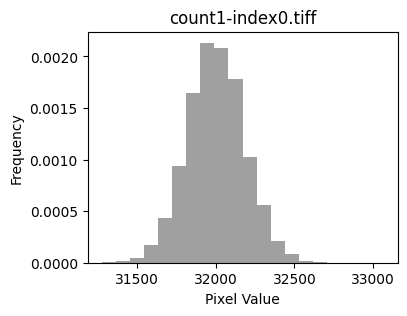

min model value: 10.0:
-66312.19


In [ ]:
# file_path = 'count1-index0.tiff'
from scipy.special import gammaln
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import argparse

def extract_pixel_values(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Convert the image to a numpy array
        pixel_values = np.array(img)
    return pixel_values

def plot_histogram(pixel_values):
    # Flatten the pixel values array
    pixel_values_flat = pixel_values.flatten()
    
    # Plot the histogram
    plt.figure(figsize=(4,3))
    plt.hist(pixel_values_flat, density=True, bins=20, color='gray', alpha=0.75)
    plt.title(file_path)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

pixel_values = extract_pixel_values(file_path)

# Plot the histogram of pixel values
plot_histogram(pixel_values)

Modelhk_at_xxyy = np.ones_like(pixel_values) * np.mean(pixel_values)
min_model_value = 1e1
sum_loglikelihood = np.sum(pixel_values * np.log(np.maximum(Modelhk_at_xxyy, min_model_value)) - Modelhk_at_xxyy - gammaln(pixel_values + 1))
print(f"min model value: {min_model_value}:")
print(sum_loglikelihood)


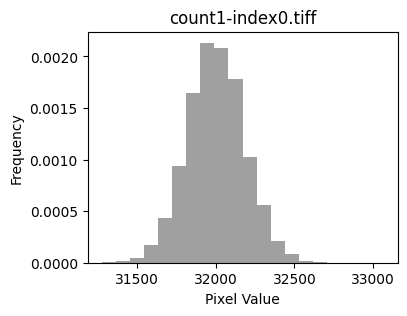

min model value: 10.0:
-66312.19


In [75]:
# file_path = 'count1-index0.tiff'
from scipy.special import gammaln
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import argparse

def extract_pixel_values(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Convert the image to a numpy array
        pixel_values = np.array(img)
    return pixel_values

def plot_histogram(pixel_values):
    # Flatten the pixel values array
    pixel_values_flat = pixel_values.flatten()
    
    # Plot the histogram
    plt.figure(figsize=(4,3))
    plt.hist(pixel_values_flat, density=True, bins=20, color='gray', alpha=0.75)
    plt.title(file_path)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

pixel_values = extract_pixel_values(file_path)

# Plot the histogram of pixel values
plot_histogram(pixel_values)

Modelhk_at_xxyy = np.ones_like(pixel_values) * np.mean(pixel_values)
min_model_value = 1e1
sum_loglikelihood = np.sum(pixel_values * np.log(np.maximum(Modelhk_at_xxyy, min_model_value)) - Modelhk_at_xxyy - gammaln(pixel_values + 1))
print(f"min model value: {min_model_value}:")
print(sum_loglikelihood)


In [43]:
import os
from PIL import Image
import numpy as np

def get_max_min_difference(image_path):
    with Image.open(image_path) as img:
        pixel_values = np.array(img)
    
    max_value = np.max(pixel_values)
    threshold = max_value * 0.5
    count_above_threshold = np.sum(pixel_values >= threshold)
    
    if count_above_threshold >= 5:
        return max_value - np.min(pixel_values)
    else:
        return 0  # or any other value indicating the condition is not met

directory = 'C:\\github_repos\\Hypothesis-Test-Based-Particle-Detection\\div_images'
diffs = []

for filename in os.listdir(directory):
    if filename.endswith('.tiff'):
        file_path = os.path.join(directory, filename)
        diff = get_max_min_difference(file_path)
        diffs.append((diff, file_path))

# Sort the list of tuples by the first element (diff) in descending order
diffs.sort(reverse=True, key=lambda x: x[0])

# Get the top 3 file paths
top_3_file_paths = [file_path for _, file_path in diffs[:3]]

print("Top 3 files with greatest max-min value difference:", top_3_file_paths)

Top 3 files with greatest max-min value difference: ['C:\\github_repos\\Hypothesis-Test-Based-Particle-Detection\\div_images\\sub_image_1_16.tiff', 'C:\\github_repos\\Hypothesis-Test-Based-Particle-Detection\\div_images\\sub_image_2_16.tiff', 'C:\\github_repos\\Hypothesis-Test-Based-Particle-Detection\\div_images\\sub_image_15_22.tiff']


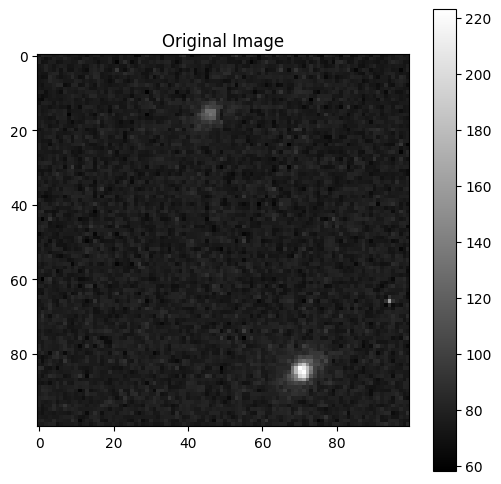

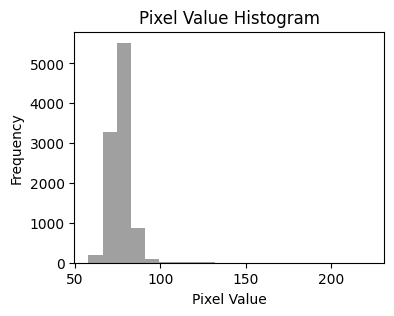

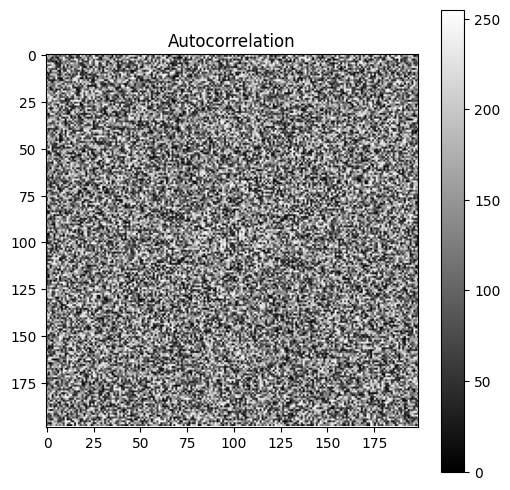

Most frequent pixel value: 76.0


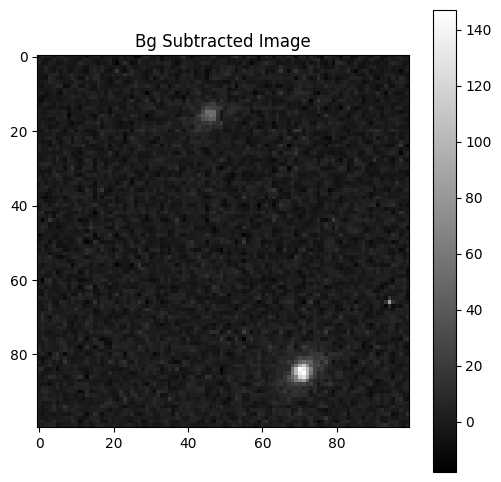

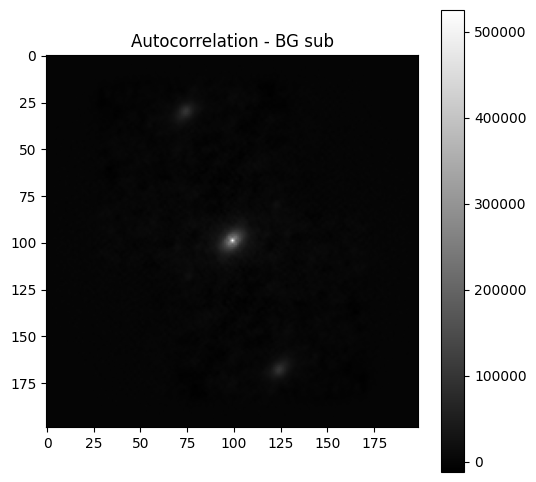

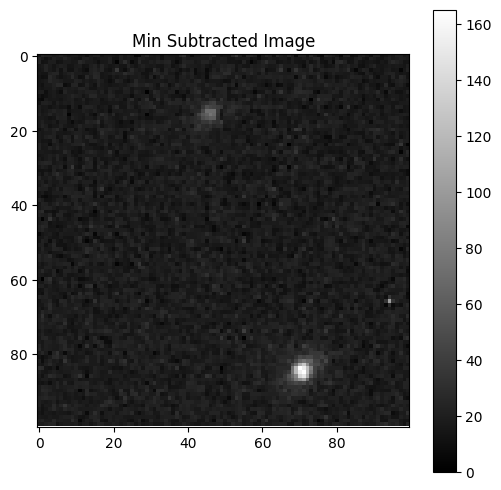

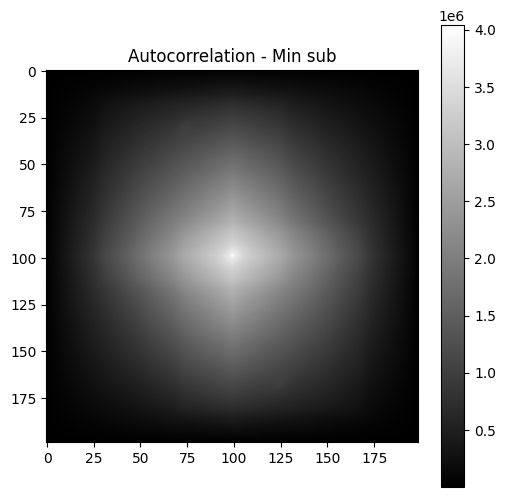

In [58]:
from PIL import Image
from scipy.signal import correlate2d
import numpy as np
from matplotlib import pyplot as plt

def calculate_autocorrelation(img):
    # Convert the image to a numpy array
    pixel_values = np.array(img)
    
    # Calculate the autocorrelation
    autocorrelation = correlate2d(pixel_values, pixel_values, mode='full')
    
    return autocorrelation

# file_path = os.path.join(max_diff_file_path)
# img = Image.open(file_path)

# Synthesize input image
bg_value = 100
bg_value = 76
image_size = (100, 100)
intensity = 2000
intensity = 140
synthesized_image = np.full(image_size, bg_value, dtype=np.float32)

# Generate 2D Gaussian PSF
def gaussian_2d(x, y, x0, y0, sigma):
    return np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))

# Random location for the Gaussian PSF
# np.random.seed(42)  # For reproducibility
x0, y0 = np.random.rand() * (image_size[0] - 1), np.random.rand() * (image_size[1] - 1)
sigma = 2

# Create meshgrid
x = np.arange(0, image_size[0])
y = np.arange(0, image_size[1])
x, y = np.meshgrid(x, y)

# Generate the PSF
psf = intensity * gaussian_2d(x, y, x0, y0, sigma)

# Normalize PSF to have a peak value of 255
# psf = (psf / psf.max()) * 255
# psf = psf.astype(np.uint8)

# Add PSF to the synthesized image without clipping
synthesized_image = synthesized_image + psf
# Apply Poisson noise to the synthesized image
# synthesized_image = np.random.poison(synthesized_image)

# Convert to PIL image
# img = Image.fromarray(synthesized_image)
# img = synthesized_image

file_path = top_3_file_paths[0]
img = Image.open(file_path)


# Show the image
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.colorbar()  # Add colorbar to the original image plot
plt.show()

# Plot the histogram of pixel values
pixel_values = np.array(img, dtype=np.float32)
plt.figure(figsize=(4, 3))
plt.hist(pixel_values.flatten(), bins=20, color='gray', alpha=0.75)
plt.title('Pixel Value Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


autocorrelation = calculate_autocorrelation(img)
plt.figure(figsize=(6, 6))
plt.imshow(autocorrelation, cmap='gray')
plt.title('Autocorrelation')
plt.colorbar()
plt.show()


# Get the most frequent pixel value
unique, counts = np.unique(pixel_values, return_counts=True)
most_frequent_pixel_value = unique[np.argmax(counts)]
print(f"Most frequent pixel value: {most_frequent_pixel_value}")
if most_frequent_pixel_value not in unique:
    bin_size = 1
    while True:
        bins = np.arange(pixel_values.min(), pixel_values.max() + bin_size, bin_size)
        hist, bin_edges = np.histogram(pixel_values, bins=bins)
        max_bin_indices = np.where(hist == np.max(hist))[0]
        if len(max_bin_indices) == 1:
            max_bin_index = max_bin_indices[0]
            avg_pixel_value = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2
            print(f"Average pixel value of the most frequent bin: {avg_pixel_value}")
            most_frequent_pixel_value = avg_pixel_value
            break
            bin_size += 1

bg_subtracted_img = pixel_values - most_frequent_pixel_value
min_subtracted_img = pixel_values - np.min(pixel_values)

# Show the background subtracted image
plt.figure(figsize=(6, 6))
plt.imshow(bg_subtracted_img, cmap='gray')
plt.title('Bg Subtracted Image')
plt.colorbar()
plt.show()

# Example usage
# Calculate the autocorrelation of the background subtracted image
autocorrelation_bgsub = calculate_autocorrelation(bg_subtracted_img)

# Show the autocorrelation of the background subtracted image
plt.figure(figsize=(6, 6))
plt.imshow(autocorrelation_bgsub, cmap='gray')
plt.title('Autocorrelation - BG sub')
plt.colorbar()
plt.show()

# Show the background subtracted image
plt.figure(figsize=(6, 6))
plt.imshow(min_subtracted_img, cmap='gray')
plt.title('Min Subtracted Image')
plt.colorbar()
plt.show()

autocorrelation_minsub = calculate_autocorrelation(min_subtracted_img)
plt.figure(figsize=(6, 6))
plt.imshow(autocorrelation_minsub, cmap='gray')
plt.title('Autocorrelation - Min sub')
plt.colorbar()
plt.show()

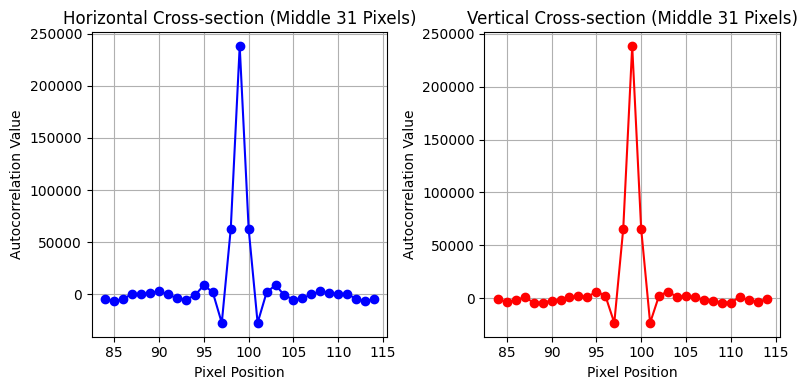

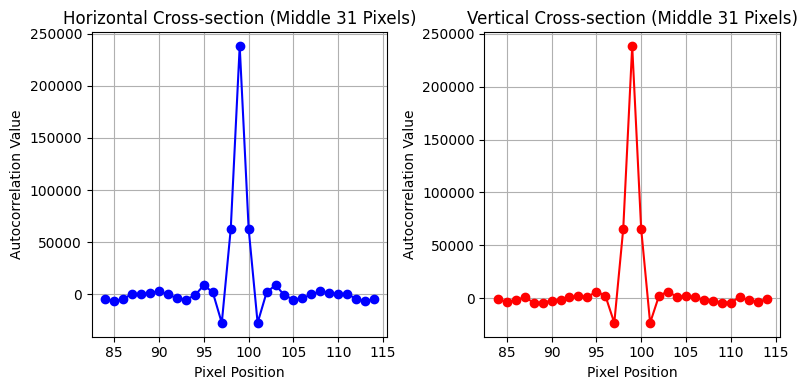

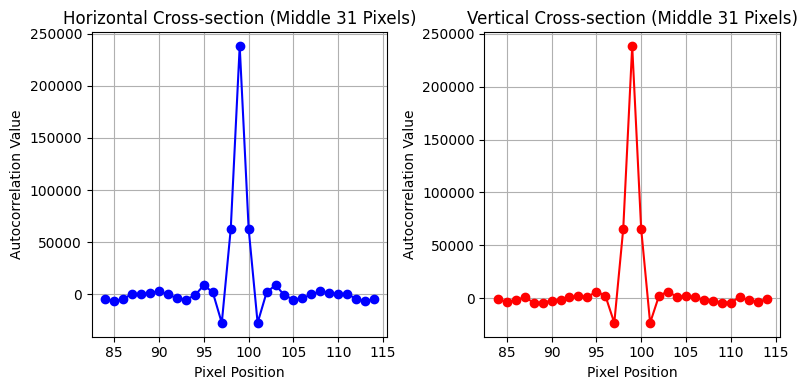

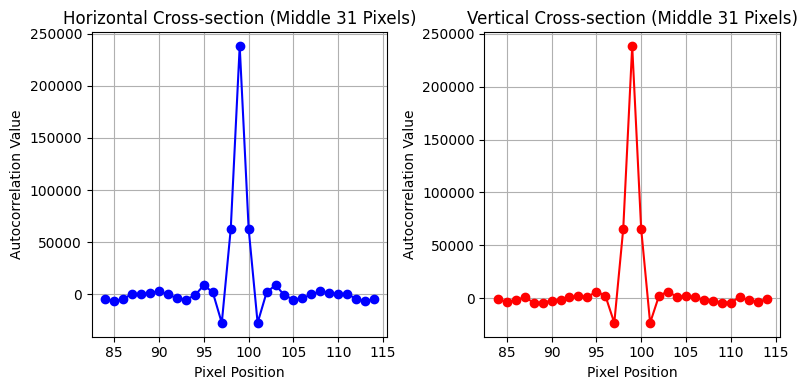

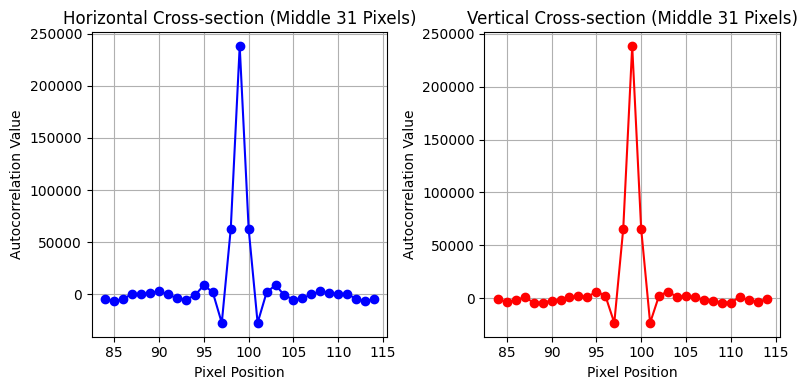

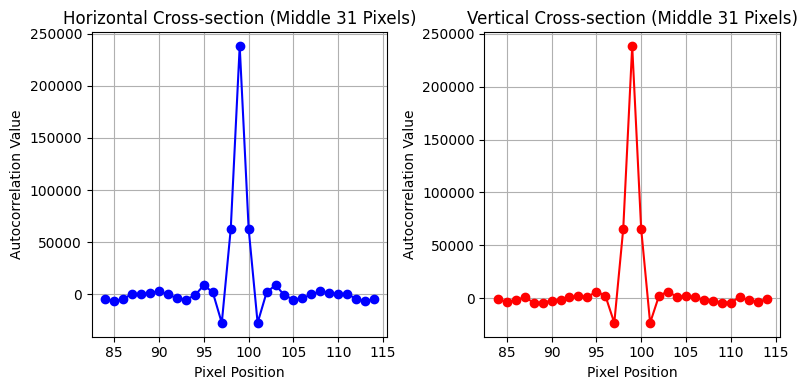

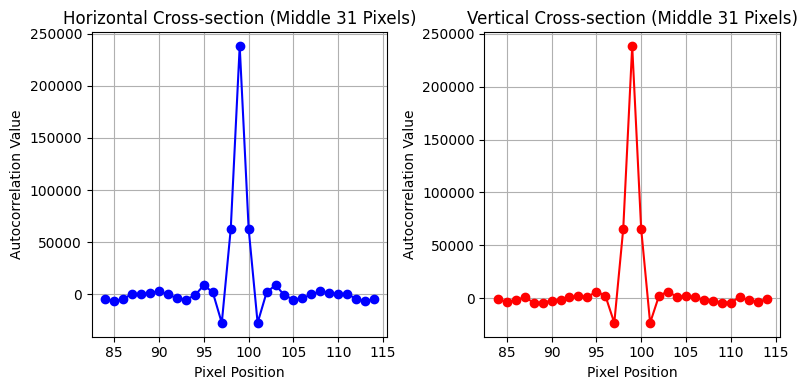

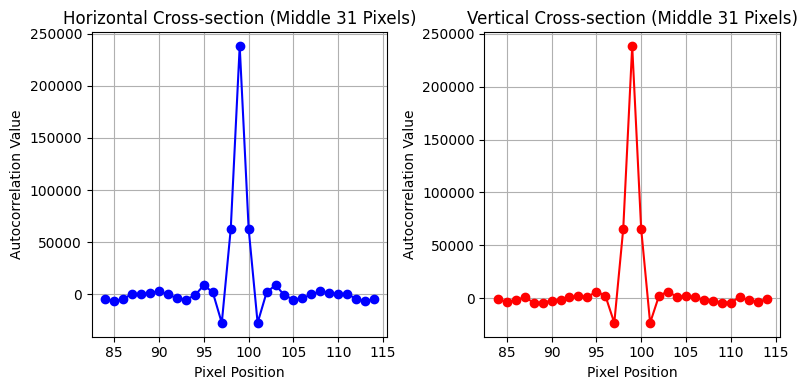

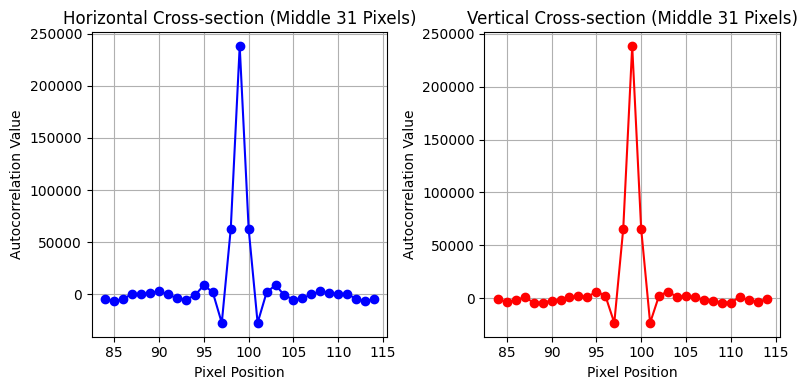

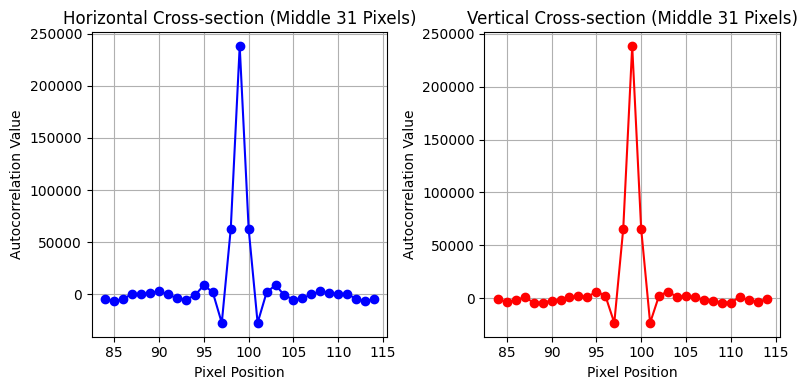

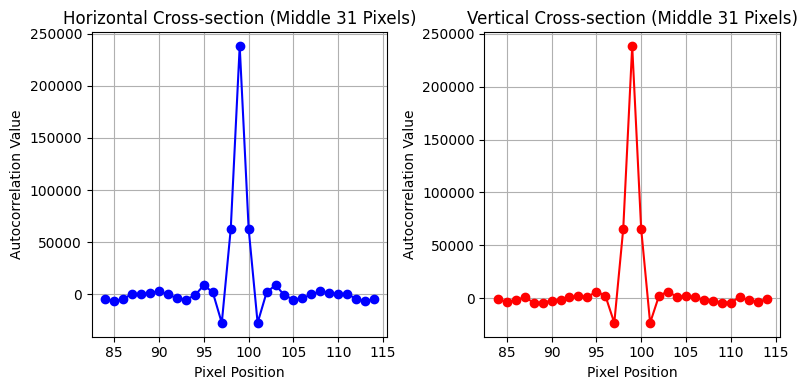

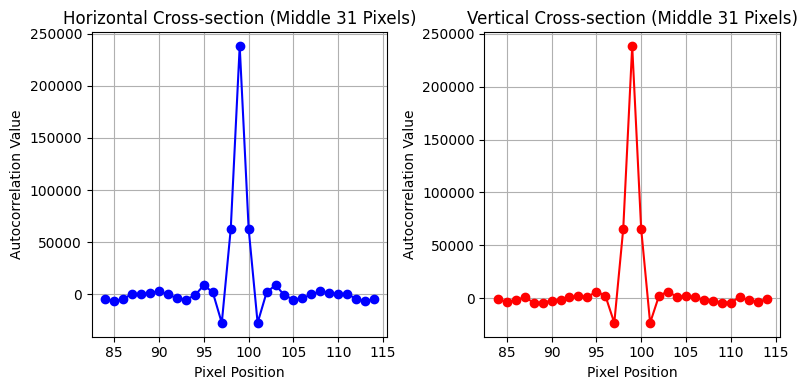

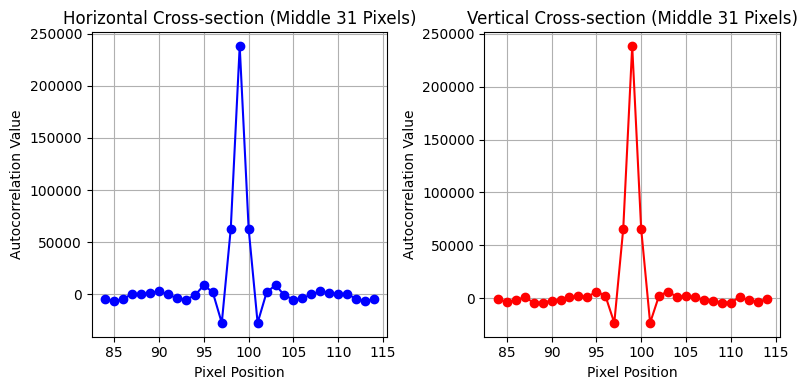

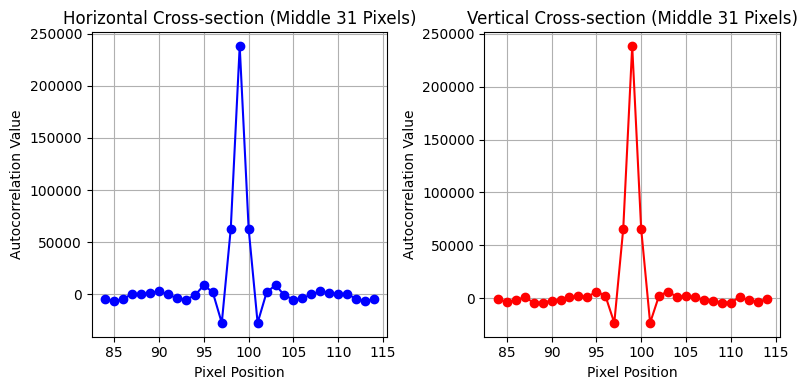

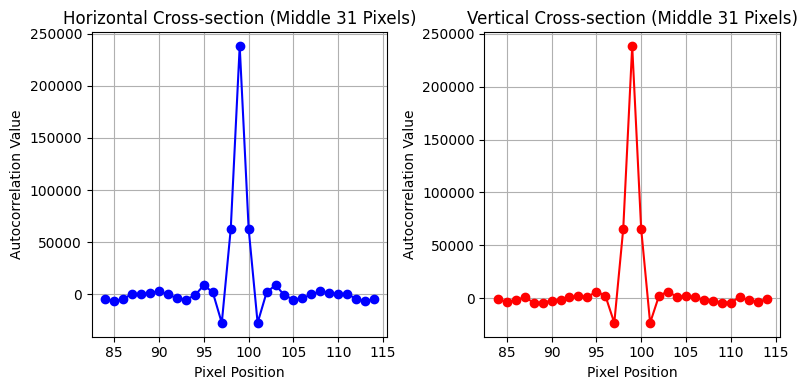

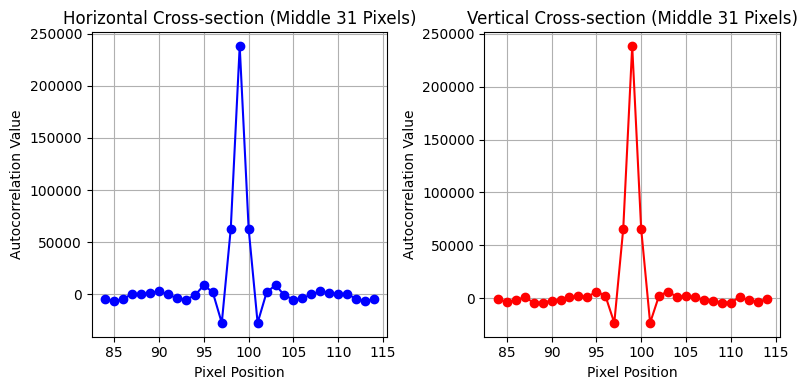

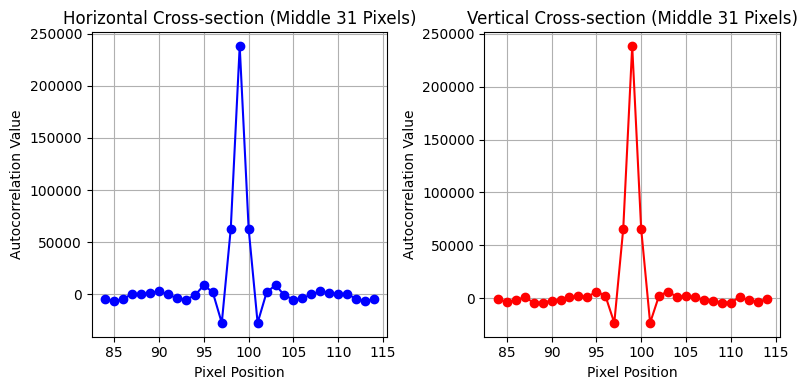

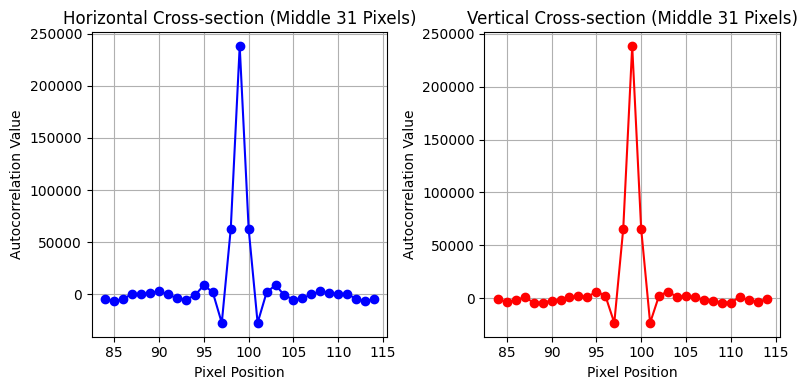

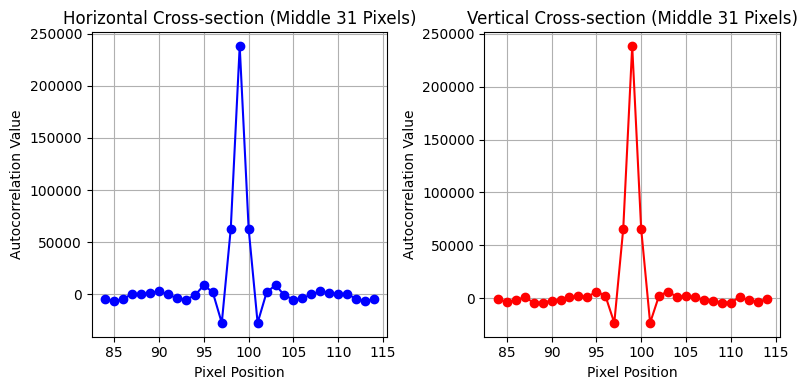

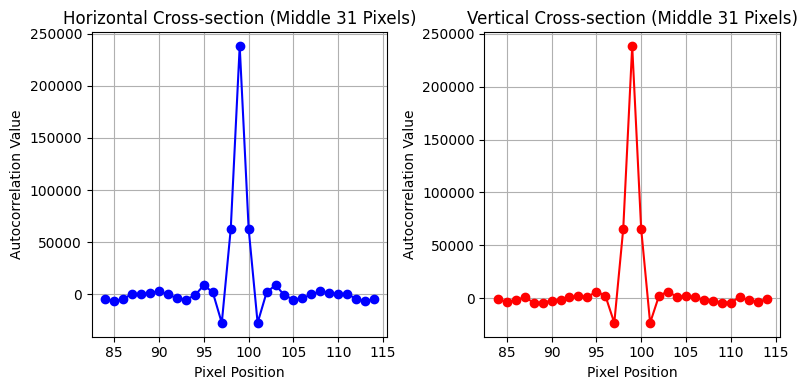

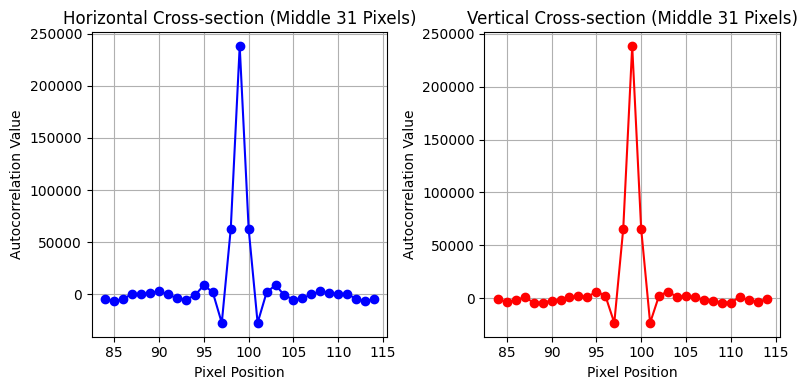

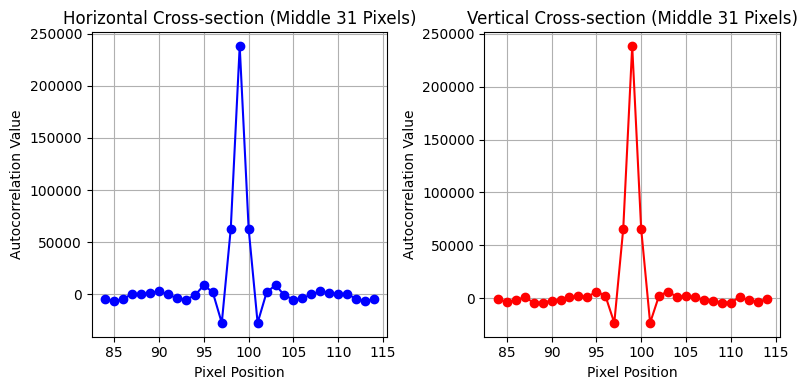

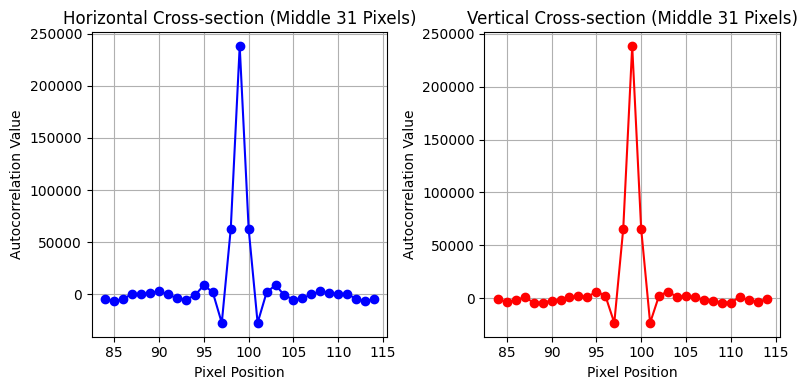

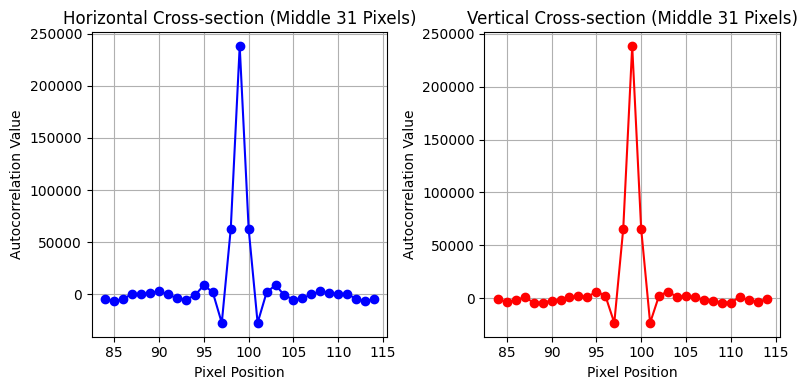

In [20]:
from PIL import Image
from scipy.ndimage import gaussian_filter
from scipy.signal import correlate2d
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import os

def calculate_autocorrelation(img):
    # Convert the image to a numpy array
    pixel_values = np.array(img)
    
    # Calculate the autocorrelation
    autocorrelation = correlate2d(pixel_values, pixel_values, mode='full')
    # autocorrelation = correlate2d(pixel_values, pixel_values, mode='same')
    
    return autocorrelation

def normalized_autocorrelation(image):
    raw_ac = correlate2d(image, image, mode='full')
    valid_pixel_counts = correlate2d(np.ones_like(image), np.ones_like(image), mode='full')
    # plt.imshow(valid_pixel_counts, cmap='gray')
    # plt.colorbar()
    # plt.show()
    # pass
    # plt.imshow(raw_ac, cmap='gray')
    # pass

    return raw_ac / valid_pixel_counts  # Normalize by valid pixels


# directory = 'C:\\github_repos\\Hypothesis-Test-Based-Particle-Detection\\div_images'
directory = 'C:\\github_repos\\Hypothesis-Test-Based-Particle-Detection\\particle_images'

sigmas = []

for filename in os.listdir(directory):
    if filename.endswith('.tiff'):
        # most_frequent_pixel_value = 0
        # print(f"\rProcessing file: {filename} ({(os.listdir(directory).index(filename) + 1) / len(os.listdir(directory)) * 100:.2f}%)", end="")
        # img = Image.open(os.path.join(directory, filename))
        # pixel_values = np.array(img, dtype=np.float32)
        # sd = np.std(pixel_values)
        # if pixel_values.max() < pixel_values.mean() + 3 * sd:
        #     continue
        # max_pixel_value = pixel_values.max()
        # threshold = 0.5 * max_pixel_value

        # # Get the most frequent pixel value
        # unique, counts = np.unique(pixel_values, return_counts=True)
        # most_frequent_pixel_value = unique[np.argmax(counts)]
        # # print(f"Most frequent pixel value: {most_frequent_pixel_value}")
        # if most_frequent_pixel_value not in unique:
        #     bin_size = 1
        #     while True:
        #         bins = np.arange(pixel_values.min(), pixel_values.max() + bin_size, bin_size)
        #         hist, bin_edges = np.histogram(pixel_values, bins=bins)
        #         max_bin_indices = np.where(hist == np.max(hist))[0]
        #         if len(max_bin_indices) == 1:
        #             max_bin_index = max_bin_indices[0]
        #             avg_pixel_value = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2
        #             print(f"Average pixel value of the most frequent bin: {avg_pixel_value}")
        #             most_frequent_pixel_value = avg_pixel_value
        #             break
        #             bin_size += 1

        bg_estimate = gaussian_filter(pixel_values, sigma=10)  # Estimate background with a large blur
        bg_subtracted_img = pixel_values - bg_estimate

        # bg_subtracted_img = pixel_values - most_frequent_pixel_value

        # Calculate the autocorrelation of the background subtracted image
        autocorrelation_bgsub = calculate_autocorrelation(bg_subtracted_img)
        # autocorrelation_bgsub = calculate_autocorrelation(pixel_values)
        # autocorrelation_bgsub = normalized_autocorrelation(pixel_values)
        
        
        # Define a 2D Gaussian function
        def gaussian_2d(xy, sigma, amplitude):
            x, y = xy
            norm_factor = 1 / (2 * np.pi * sigma ** 2)
            return amplitude * norm_factor * np.exp(-(((x - 199/2) ** 2) / (2 * sigma ** 2) + ((y - 199/2) ** 2) / (2 * sigma ** 2))).ravel()

        # Create meshgrid for fitting
        x = np.arange(autocorrelation_bgsub.shape[1])
        y = np.arange(autocorrelation_bgsub.shape[0])
        x, y = np.meshgrid(x, y)

        center_x_index = int(autocorrelation_bgsub.shape[1] / 2)
        center_y_index = int(autocorrelation_bgsub.shape[0] / 2)

        horizontal_cross_section = autocorrelation_bgsub[center_y_index, :]
        vertical_cross_section = autocorrelation_bgsub[:, center_x_index]

        # Plot cross-sections
        plt.figure(figsize=(8, 4))

        # Plot horizontal cross-section
        plt.subplot(121)
        middle_start = len(horizontal_cross_section) // 2 - 15
        # middle_start = 0
        middle_end = len(horizontal_cross_section) // 2 + 16
        # middle_end = len(horizontal_cross_section) - 1
        plt.plot(np.arange(middle_start, middle_end), horizontal_cross_section[middle_start:middle_end], 'bo-', label='Data')
        # plt.semilogy(np.arange(middle_start, middle_end), horizontal_cross_section[middle_start:middle_end], 'bo-', label='Data')
        plt.title('Horizontal Cross-section (Middle 31 Pixels)')
        plt.xlabel('Pixel Position')
        plt.ylabel('Autocorrelation Value')
        plt.grid(True)

        # Plot vertical cross-section
        plt.subplot(122)
        middle_start = len(vertical_cross_section) // 2 - 15
        middle_end = len(vertical_cross_section) // 2 + 16
        plt.plot(np.arange(middle_start, middle_end), vertical_cross_section[middle_start:middle_end], 'ro-', label='Data')
        # plt.semilogy(np.arange(middle_start, middle_end), vertical_cross_section[middle_start:middle_end], 'ro-', label='Data')
        plt.title('Vertical Cross-section (Middle 31 Pixels)')
        plt.xlabel('Pixel Position')
        plt.ylabel('Autocorrelation Value')
        plt.grid(True)

        plt.tight_layout()
        plt.show()
        pass

In [ ]:
            

        # Initial guess for the parameters
        initial_guess = (2.3, np.max(autocorrelation_bgsub))

        # Fit the 2D Gaussian function to the autocorrelation data
        try:
            params, _ = curve_fit(gaussian_2d, (x, y), autocorrelation_bgsub.ravel(), p0=initial_guess)
        except RuntimeError as e:
            print(f"Error - curve_fit failed: {e}")
            continue

        # Extract the fitted parameters
        sigma_fit, amplitude_fit = params
        sigma_fit = np.abs(sigma_fit)
        # if sigma_fit < 15:
        # # if True:
        #     print(f"\nFitted sigma: {sigma_fit}")
        #     print(f"Fitted amplitude: {amplitude_fit}")

        # # Create the figure and axis
        # fig, axes = plt.subplots(1, 3, figsize=(18, 4))

        # # Show the original image
        # ax = axes[0]
        # ax.set_title('BG sub image')
        # fig.colorbar(ax.imshow(bg_subtracted_img, cmap='gray'), ax=ax)
        # # ax.axis('off')

        # # Show the original image
        # ax = axes[1]
        # # ax.imshow(autocorrelation_bgsub, cmap='gray')
        # ax.set_title('Autocorr')
        # fig.colorbar(ax.imshow(autocorrelation_bgsub, cmap='gray'), ax=ax)
        # # ax.axis('off')

        # # Generate the fitted 2D Gaussian
        # fitted_gaussian = gaussian_2d((x, y), sigma_fit, amplitude_fit).reshape(autocorrelation_bgsub.shape)

        # # Show the fitted 2D Gaussian
        # ax = axes[2]
        # # ax.imshow(fitted_gaussian, cmap='gray')
        # ax.set_title('Fitted 2D Gaussian')
        # fig.colorbar(ax.imshow(fitted_gaussian, cmap='gray'), ax=ax)
        # # Print fitted sigma on the image with text
        # ax.text(0.05, 0.95, f'Sigma: {sigma_fit:.2f}', transform=ax.transAxes, fontsize=12, color='white', verticalalignment='top')
        # # Print fitted amplitude on the image with text
        # ax.text(0.05, 0.90, f'Amplitude: {amplitude_fit:.1e}', transform=ax.transAxes, fontsize=12, color='white', verticalalignment='top')
        # plt.show()
        pass

        sigmas.append(sigma_fit)

filtered_sigmas = [s for s in sigmas if 1 < s < 15]
        
# Plot the histogram of sigmas
plt.figure(figsize=(6, 4))
plt.hist(filtered_sigmas, bins=20, color='blue', alpha=0.7)
plt.axvline(np.mean(filtered_sigmas), color='red', linestyle='dashed', linewidth=1)
plt.text(np.mean(filtered_sigmas), max(plt.ylim()), f'Mean: {np.mean(filtered_sigmas):.2f}', color='red', ha='center')
plt.title('Histogram of Sigmas (filtered [1, 15])')
plt.xlabel('Sigma')
plt.ylabel('Frequency')
plt.show()


    

    # # Show the autocorrelation of the background subtracted image
        # plt.figure(figsize=(6, 6))
        # plt.imshow(autocorrelation_bgsub, cmap='gray')
        # plt.title('Autocorrelation - BG sub')
        # plt.colorbar()
        # plt.show()


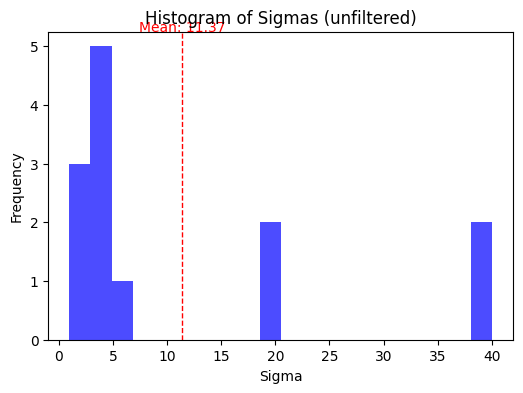

In [19]:

# Plot the histogram of sigmas
plt.figure(figsize=(6, 4))
# bins = np.linspace(0, 8, 20)
bins = 20
plt.hist(sigmas, bins=bins, color='blue', alpha=0.7)
plt.axvline(np.mean(sigmas), color='red', linestyle='dashed', linewidth=1)
plt.text(np.mean(sigmas), max(plt.ylim()), f'Mean: {np.mean(sigmas):.2f}', color='red', ha='center')
plt.title('Histogram of Sigmas (unfiltered)')
plt.xlabel('Sigma')
plt.ylabel('Frequency')
plt.show()


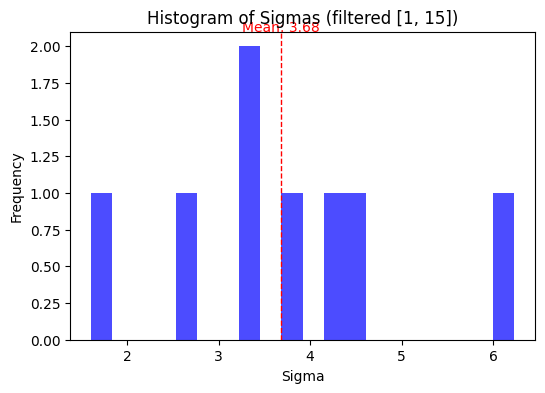

In [20]:

# Plot the histogram of sigmas
plt.figure(figsize=(6, 4))
plt.hist(filtered_sigmas, bins=20, color='blue', alpha=0.7)
plt.axvline(np.mean(filtered_sigmas), color='red', linestyle='dashed', linewidth=1)
plt.text(np.mean(filtered_sigmas), max(plt.ylim()), f'Mean: {np.mean(filtered_sigmas):.2f}', color='red', ha='center')
plt.title('Histogram of Sigmas (filtered [1, 15])')
plt.xlabel('Sigma')
plt.ylabel('Frequency')
plt.show()


In [21]:
print(np.mean(filtered_sigmas) / np.sqrt(2))

2.6007224237731


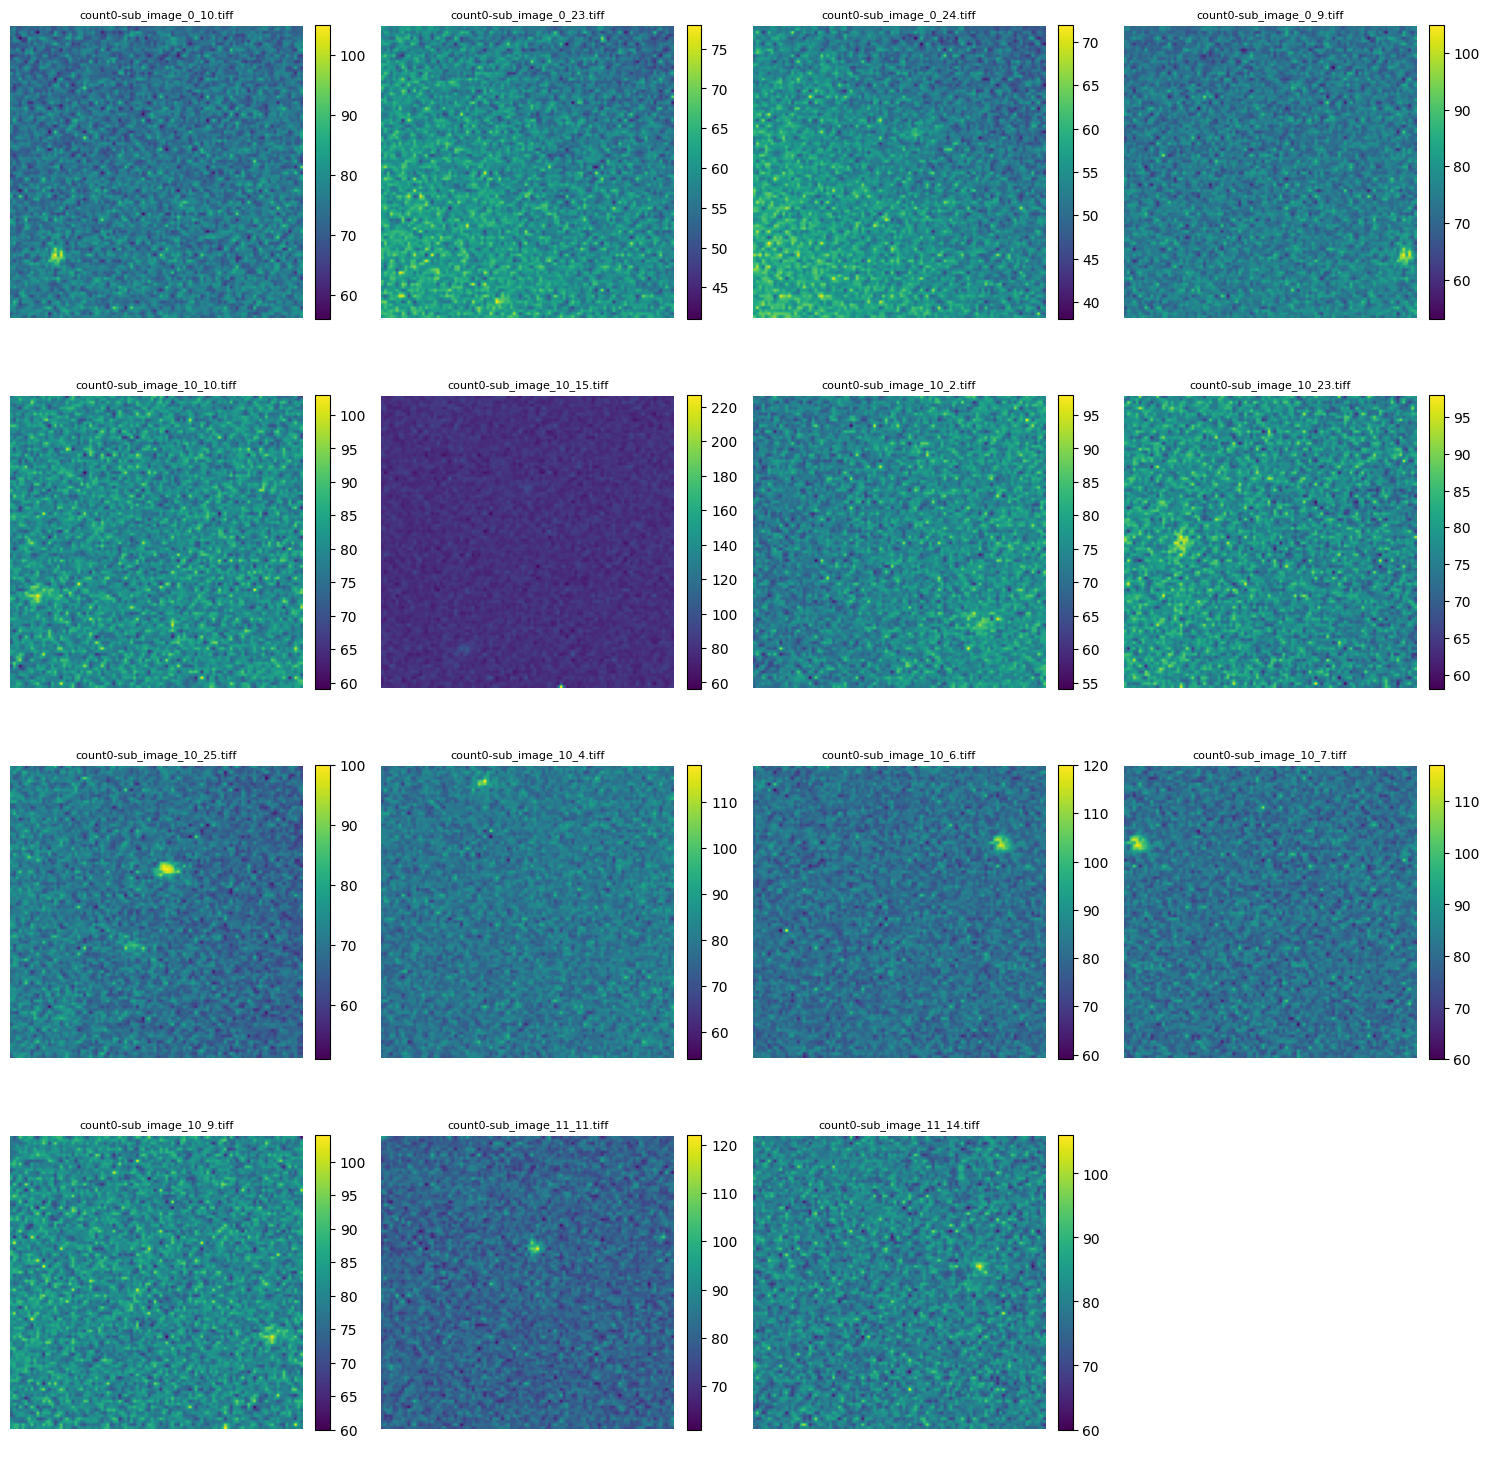

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

foldername = './datasets/div_images_labeled'
files = [
    "count0-sub_image_0_10.tiff",
    "count0-sub_image_0_23.tiff",
    "count0-sub_image_0_24.tiff",
    "count0-sub_image_0_9.tiff",
    "count0-sub_image_10_10.tiff",
    "count0-sub_image_10_15.tiff",
    "count0-sub_image_10_2.tiff",
    "count0-sub_image_10_23.tiff",
    "count0-sub_image_10_25.tiff",
    "count0-sub_image_10_4.tiff",
    "count0-sub_image_10_6.tiff",
    "count0-sub_image_10_7.tiff",
    "count0-sub_image_10_9.tiff",
    "count0-sub_image_11_11.tiff",
    "count0-sub_image_11_14.tiff"
]
num_files = len(files)
num_cols = int(np.ceil(np.sqrt(num_files)))
num_rows = int(np.ceil(num_files / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()
for i, file in enumerate(files):
    img = Image.open(os.path.join(foldername, file))
    pixel_values = np.array(img, dtype=np.float32)
    ax = axes[i]
    cax = ax.imshow(pixel_values, cmap='viridis')
    ax.set_title(file, fontsize=8)
    ax.axis('off')
    fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

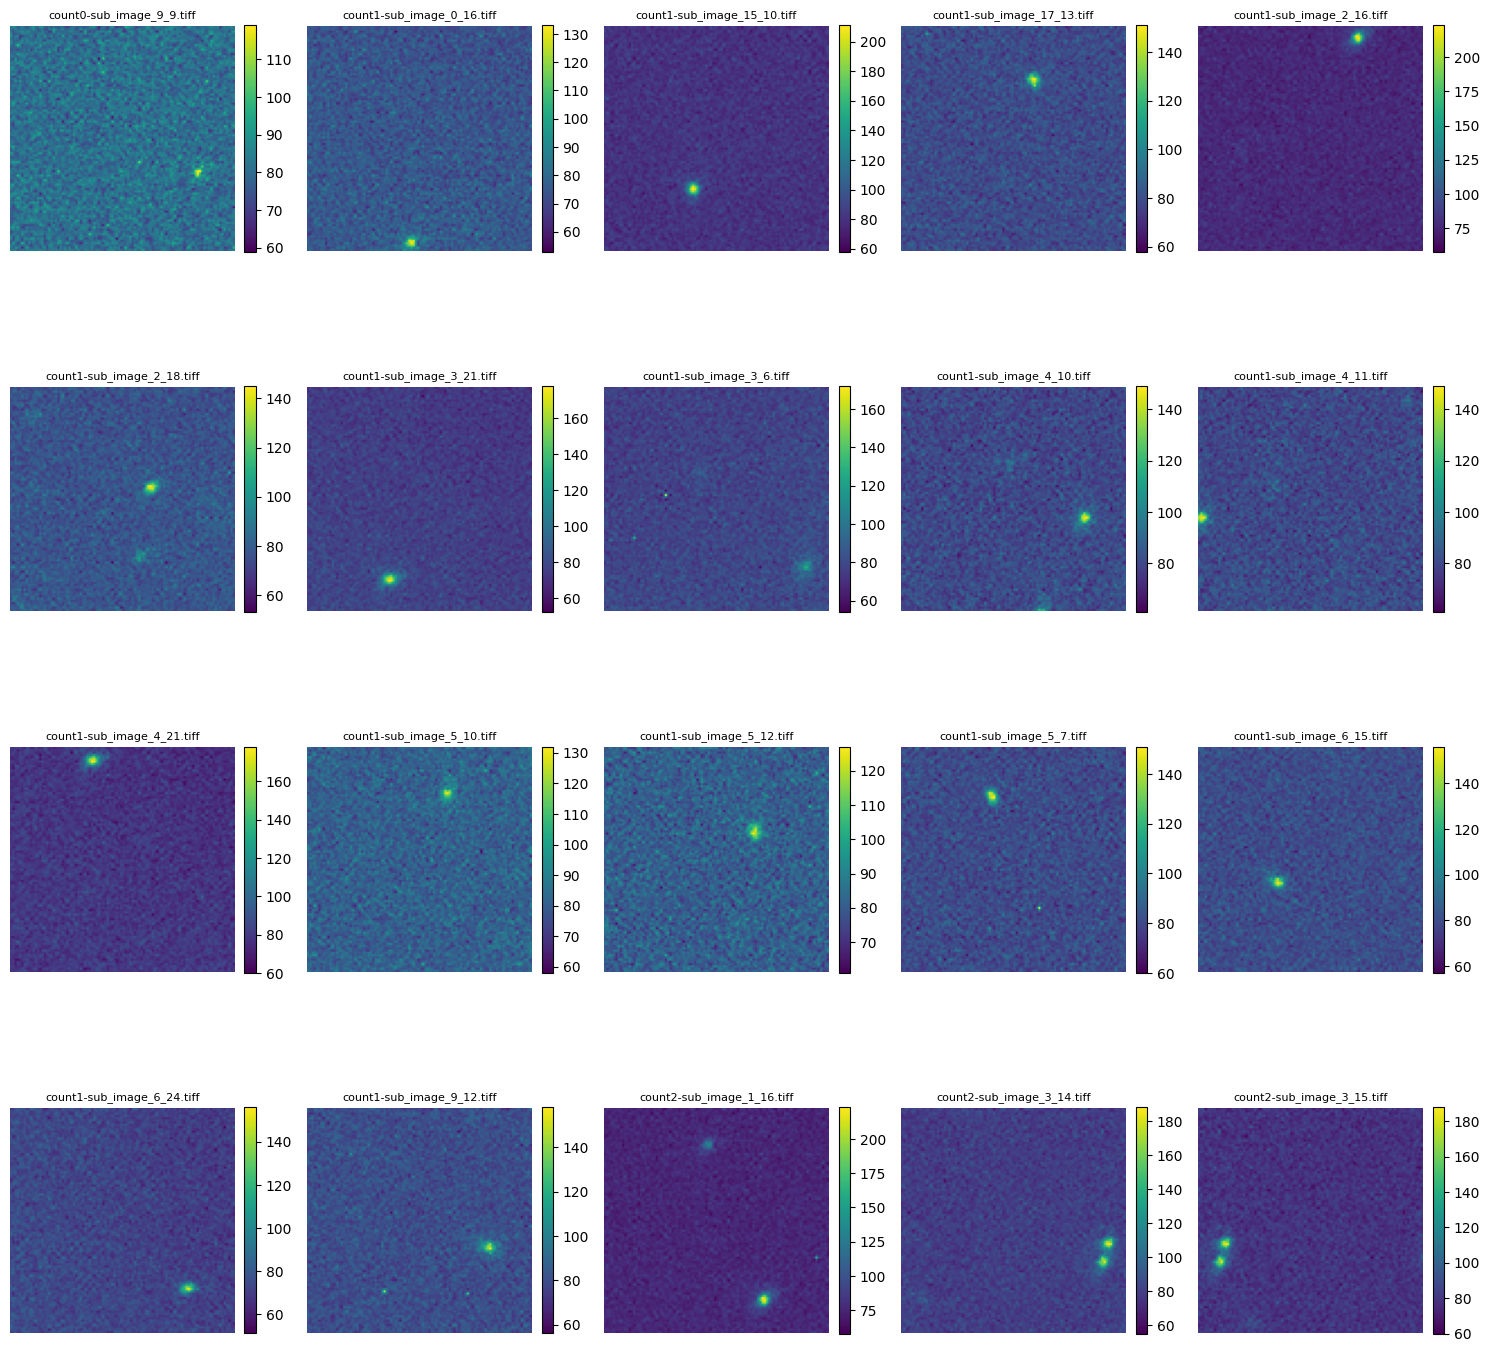

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

files = [
    "count0-sub_image_9_9.tiff",
    "count1-sub_image_0_16.tiff",
    "count1-sub_image_15_10.tiff",
    "count1-sub_image_17_13.tiff",
    "count1-sub_image_2_16.tiff",
    "count1-sub_image_2_18.tiff",
    "count1-sub_image_3_21.tiff",
    "count1-sub_image_3_6.tiff",
    "count1-sub_image_4_10.tiff",
    "count1-sub_image_4_11.tiff",
    "count1-sub_image_4_21.tiff",
    "count1-sub_image_5_10.tiff",
    "count1-sub_image_5_12.tiff",
    "count1-sub_image_5_7.tiff",
    "count1-sub_image_6_15.tiff",
    "count1-sub_image_6_24.tiff",
    "count1-sub_image_9_12.tiff",
    "count2-sub_image_1_16.tiff",
    "count2-sub_image_3_14.tiff",
    "count2-sub_image_3_15.tiff"
]


foldername = './datasets/div_images_labeled'

num_files = len(files)
num_cols = int(np.ceil(np.sqrt(num_files)))
num_rows = int(np.ceil(num_files / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()
for i, file in enumerate(files):
    img = Image.open(os.path.join(foldername, file))
    pixel_values = np.array(img, dtype=np.float32)
    ax = axes[i]
    cax = ax.imshow(pixel_values, cmap='viridis')
    ax.set_title(file, fontsize=8)
    ax.axis('off')
    fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()